In [1]:
%matplotlib inline
import torch
from PIL import Image
from torch import nn
import matplotlib.pyplot as plt
import os
import random
from torchvision import transforms

In [2]:
class Knockout(nn.Module):
    def __init__(self, p: float = 0.5):
        super().__init__()
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, " "but got {}".format(p))
        self.p = p

    def forward(self, x):
        if self.training:
            binomial = torch.distributions.binomial.Binomial(probs=1-self.p)
            b, c, h, w = x.shape
            mask = binomial.sample((b, 1, h, w))
            return x * mask 
        return x

In [3]:
DATA_DIR = 'lbl_data_resized/'
NROWS, NCOLS = 3, 3
SAMPLE_SIZE = NROWS * NCOLS

In [4]:
def display_ims(batch, nrows, ncols, title, figsize=(15, 15), save=True):
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)
    to_pil = transforms.ToPILImage()
    index = 0
    for i in range(nrows):
        for j in range(ncols):
            tensor = batch[index]
            index += 1
            image = to_pil(tensor.detach())
            ax[i, j].imshow(image)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    fig.suptitle(title)
    if save:
        plt.savefig(f'{title}.jpg')

In [5]:
img_names = os.listdir(DATA_DIR)

In [6]:
sample = random.sample(img_names, k=SAMPLE_SIZE)

In [7]:
tfms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor()
])

In [8]:
class SatelliteData(torch.utils.data.Dataset):
    def __init__(self, root, tfms):
        self.root = root
        self.tfms = tfms
        self.images = os.listdir(self.root)
    
    def load_pil(self, img_path):
        img = Image.open(img_path)
        img = img.convert('RGB')
        return img
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        img_name = self.images[index]
        img = self.load_pil(os.path.join(self.root, img_name))
        return tfms(img)

In [9]:
ds = SatelliteData(DATA_DIR, tfms)
dl = torch.utils.data.DataLoader(ds, batch_size=SAMPLE_SIZE, shuffle=True)

In [10]:
batch = next(iter(dl))

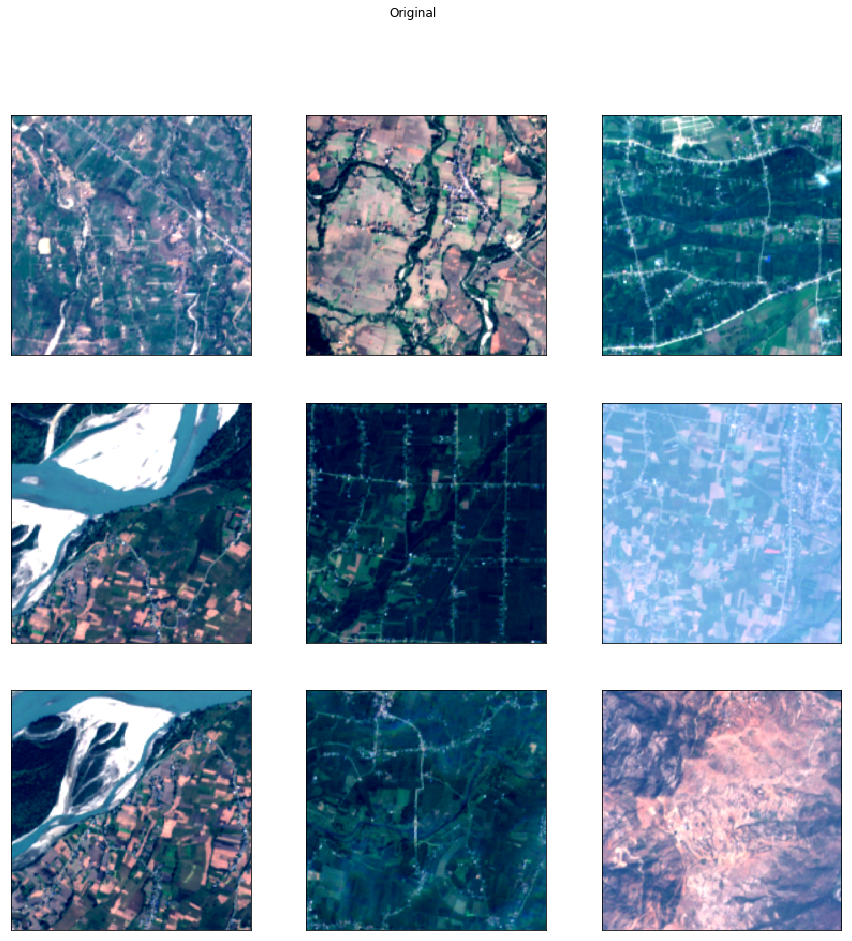

In [11]:
display_ims(batch, NROWS, NCOLS, 'Original')

In [12]:
ko = Knockout(0.2)

In [13]:
koed = ko(batch)

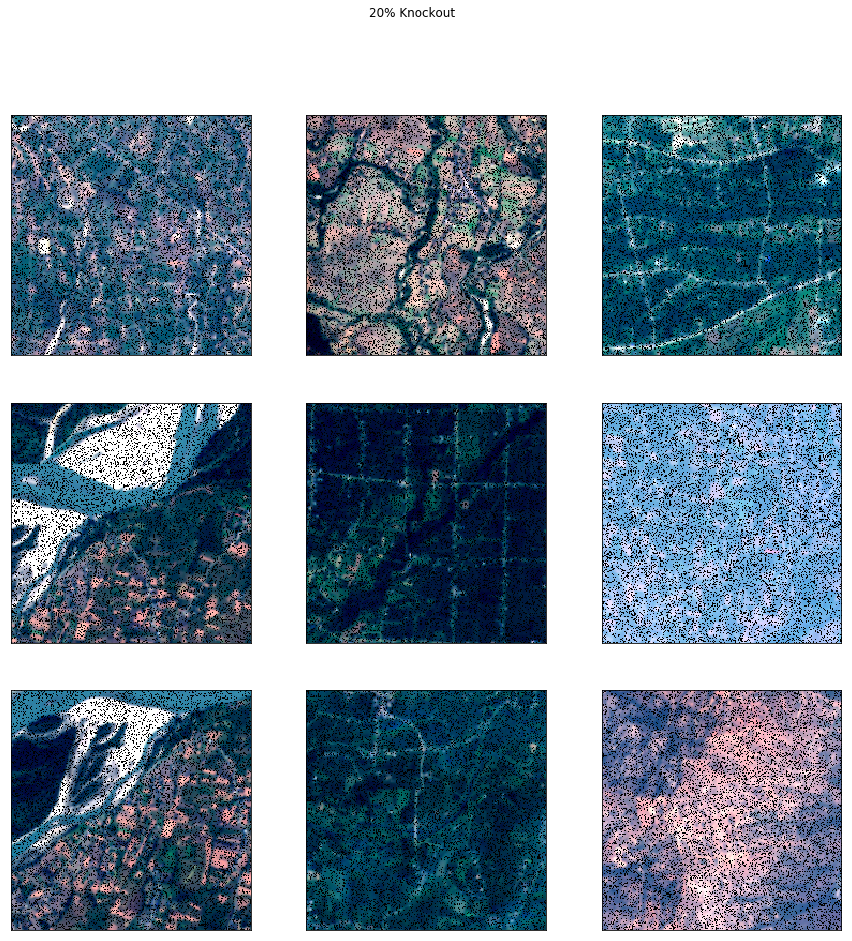

In [15]:
display_ims(koed, NROWS, NCOLS, '20% Knockout')

In [16]:
ko = Knockout(0.1)

In [17]:
koed = ko(batch)

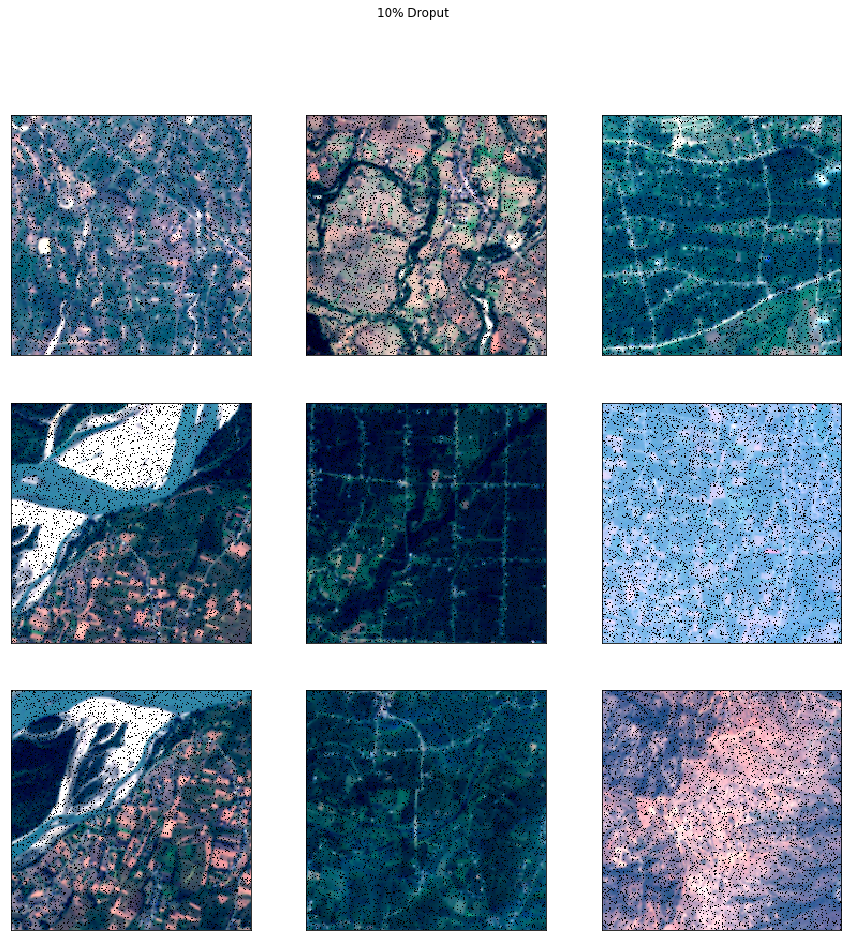

In [19]:
display_ims(koed, NROWS, NCOLS, '10% Droput')

In [20]:
ko = Knockout(0.05)

In [21]:
koed = ko(batch)

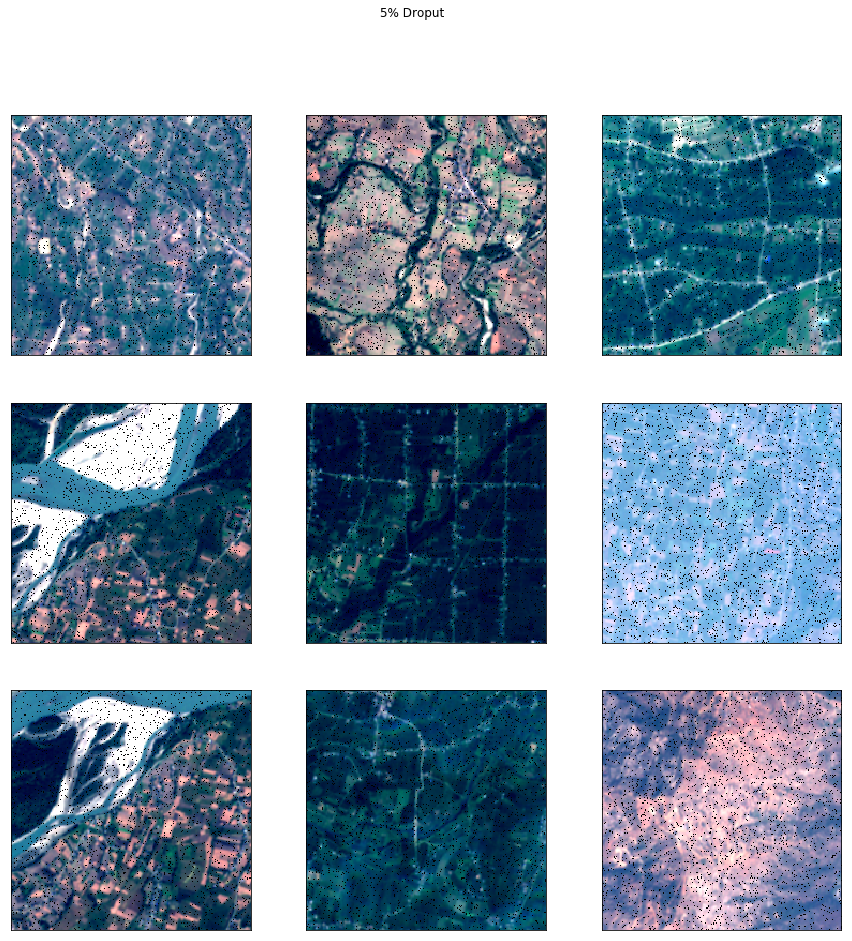

In [22]:
display_ims(koed, NROWS, NCOLS, '5% Droput')